In [2]:
import pickle
from utils import load_model_from_epoch, load_model
from gen_batch import get_hpobench_batch_fn, get_mtgp_batch

/home/lily_l/private_multitask_pfn/PFNs/pfns/priors/utils.py:293: FutureWarning: Decorating classes is deprecated and will be disabled in future versions. You should only decorate functions or methods. To preserve the current behavior of class decoration, you can directly decorate the `__init__` method and nothing else.
  @torch.no_grad()


In [128]:
lr_batch_fn = get_hpobench_batch_fn('lr', train=False)

batches = []
for i in range(20):
    batch = lr_batch_fn(
        batch_size=256,
        seq_len=20,
        num_features=2,
        max_num_tasks=10,
        num_tasks=1,
    )
    batches.append(batch)


In [129]:
svm_batch_fn = get_hpobench_batch_fn('svm', train=False)

svm_batches = []
for i in range(20):
    batch = svm_batch_fn(
        batch_size=256,
        seq_len=20,
        num_features=2,
        max_num_tasks=10,
        num_tasks=1,
    )
    svm_batches.append(batch)


In [130]:
mtgp_batches = []
for i in range(20):
    batch = get_mtgp_batch(
        batch_size=256,
        seq_len=20,
        num_features=2,
        max_num_tasks=10,
        num_tasks=1,
        lengthscale=None,
        hyperparameters={},
    )
    mtgp_batches.append(batch)


In [131]:
import torch
import matplotlib.pyplot as plt

In [132]:
def get_nll(model, batches, n_train=10):
    nlls = []
    for batch in batches:
        tensor_args = batch.x[:n_train], batch.task_id[:n_train], batch.y[:n_train], batch.x[n_train:], batch.task_id[n_train:]
        tensor_args = [t.cuda() for t in tensor_args]

        with torch.no_grad():
            output = model(*tensor_args)
        mean = output[..., 0].squeeze()
        var = output[..., 1].exp().squeeze()
        nll = -torch.distributions.Normal(mean, var.sqrt()).log_prob(batch.y[n_train:].squeeze()).mean()
        del output
        nlls.append(nll)
    nlls = torch.stack(nlls)
    return nlls.mean().item(),

def get_nlls(model, batches, n_train=10):
    nlls = []
    for batch in batches:
        tensor_args = batch.x[:n_train], batch.task_id[:n_train], batch.y[:n_train], batch.x[n_train:], batch.task_id[n_train:]
        tensor_args = [t.cuda() for t in tensor_args]

        with torch.no_grad():
            output = model(*tensor_args)
        mean = output[..., 0].squeeze()
        var = output[..., 1].exp().squeeze()
        nll = -torch.distributions.Normal(mean, var.sqrt()).log_prob(batch.y[n_train:].squeeze()).mean()
        del output
        nlls.append(nll)
    nlls = torch.stack(nlls)
    return nlls

In [133]:
home_dir = "/home/lily_l/private_multitask_pfn/ckpt/25-01-29_04-46-15__prior_hpobench_lr__features_2__tasks_1__epochs_200__seqlen_50__attn_standard__task_hier__seed_0__continued__37634"


In [134]:
nlls = []
svm_nlls = []
gp_nlls = []
for epoch in range(1, 20):
    print(epoch)
    model = load_model_from_epoch(home_dir, epoch * 5).to('cuda')
    nll = get_nll(model, batches)
    nlls.append(nll)
    svm_nll = get_nll(model, svm_batches)
    svm_nlls.append(svm_nll)
    gp_nll = get_nll(model, mtgp_batches)
    gp_nlls.append(gp_nll)
    del model
    

1
Using a Transformer with 6.58 M parameters
Loaded model
2
Using a Transformer with 6.58 M parameters
Loaded model
3
Using a Transformer with 6.58 M parameters
Loaded model
4
Using a Transformer with 6.58 M parameters
Loaded model
5
Using a Transformer with 6.58 M parameters
Loaded model
6
Using a Transformer with 6.58 M parameters
Loaded model
7
Using a Transformer with 6.58 M parameters
Loaded model
8
Using a Transformer with 6.58 M parameters
Loaded model
9
Using a Transformer with 6.58 M parameters
Loaded model
10
Using a Transformer with 6.58 M parameters
Loaded model
11
Using a Transformer with 6.58 M parameters
Loaded model
12
Using a Transformer with 6.58 M parameters
Loaded model
13
Using a Transformer with 6.58 M parameters
Loaded model
14
Using a Transformer with 6.58 M parameters
Loaded model
15
Using a Transformer with 6.58 M parameters
Loaded model
16
Using a Transformer with 6.58 M parameters
Loaded model
17
Using a Transformer with 6.58 M parameters
Loaded model
18
Usi

In [135]:
original_dir = "/home/lily_l/private_multitask_pfn/final_models/playful-tree-486"
original_model = load_model(original_dir, best=False).to('cuda')
nll = get_nll(original_model, batches)
nlls = [nll] + nlls
svm_nll = get_nll(original_model, svm_batches)
svm_nlls = [svm_nll] + svm_nlls
gp_nll = get_nll(original_model, mtgp_batches)
gp_nlls = [gp_nll] + gp_nlls

Using a Transformer with 6.58 M parameters
Loaded model


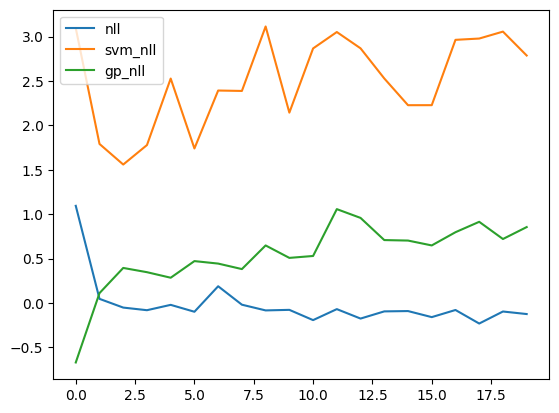

In [136]:

plt.plot(nlls, label='nll')
plt.plot(svm_nlls, label='svm_nll')
plt.plot(gp_nlls, label='gp_nll')
plt.legend()
plt.show()

In [137]:
svm_nlls

svm_nlls_updated = [(1.38,), (1.64,)] + svm_nlls[2:]

In [140]:
nlls

[(1.0934847593307495,),
 (0.045990969985723495,),
 (-0.052184343338012695,),
 (-0.08173080533742905,),
 (-0.021465713158249855,),
 (-0.09919952601194382,),
 (0.18788771331310272,),
 (-0.019634241238236427,),
 (-0.08407261967658997,),
 (-0.0778316855430603,),
 (-0.19331598281860352,),
 (-0.06958013027906418,),
 (-0.17593057453632355,),
 (-0.09505557268857956,),
 (-0.09145152568817139,),
 (-0.15969513356685638,),
 (-0.07935347408056259,),
 (-0.2318514883518219,),
 (-0.09641797840595245,),
 (-0.12503884732723236,)]

In [214]:
data = nlls, svm_nlls_updated, gp_nlls
with open('nlls.pkl', 'wb') as f:
    pickle.dump(data, f)

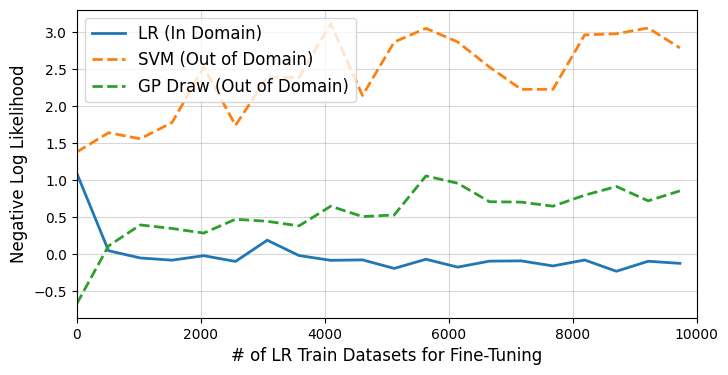

In [219]:
with open('nlls.pkl', 'rb') as f:
    data = pickle.load(f)
    
nlls, svm_nlls_updated, gp_nlls = data

xs = torch.arange(20) * 16 * 32

plt.figure(figsize=(8, 4))
plt.grid(alpha=0.5)
# plt.ylim(-0.5, 3.5)
plt.xlim(0, 10000)
plt.plot(xs, nlls, label="LR (In Domain)", linewidth=2, color="C0")
plt.plot(xs, svm_nlls_updated, label="SVM (Out of Domain)", linestyle="--", linewidth=2, color="C1")
plt.plot(xs, gp_nlls, label="GP Draw (Out of Domain)", linestyle="--", linewidth=2, color="C2")
plt.xlabel("# of LR Train Datasets for Fine-Tuning", fontsize=12)
plt.ylabel("Negative Log Likelihood", fontsize=12)
# legend above plot
plt.legend(fontsize=12, loc='upper left')
plt.savefig("finetune.pdf", bbox_inches='tight')
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=3, fontsize=10)
# legend to right of plot
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# plt.plot(svm_nlls, label='svm_nll')
# plt.plot(gp_nlls, label='gp_nll')

In [5]:
finetuned_model = load_model_from_epoch(home_dir, 195).to('cuda')
finetuned_model

Using a Transformer with 6.58 M parameters
Loaded model


TransformerModel(
  (transformer_encoder): HierarchicalTaskEncoder(
    (layers): ModuleList(
      (0): SingleTaskEncoderLayer(
        (attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=256, out_features=256, bias=True)
        )
        (norm): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
        (dropout): Dropout(p=0.0, inplace=False)
        (ff_norm): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
        (linear1): Linear(in_features=256, out_features=1024, bias=True)
        (linear2): Linear(in_features=1024, out_features=256, bias=True)
        (dropout1): Dropout(p=0.0, inplace=False)
        (dropout2): Dropout(p=0.0, inplace=False)
      )
      (1): GlobalTaskEncoderLayer(
        (attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=256, out_features=256, bias=True)
        )
        (norm): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
        (dropout): Dropout(p

In [21]:
original_dir = "/home/lily_l/private_multitask_pfn/final_models/playful-tree-486"
original_model = load_model(original_dir, best=False).to('cuda')

Using a Transformer with 6.58 M parameters
Loaded model


In [59]:
def get_nlls_mtpfn(model, aux_data, batches, n_train=10):
    nlls = []
    for batch in batches:
        tensor_args = batch.x[:n_train], batch.task_id[:n_train], batch.y[:n_train], batch.x[n_train:], batch.task_id[n_train:]
        tensor_args = [t.cuda() for t in tensor_args]
        
        train_x, task_id, train_y, test_x, test_task_id = tensor_args
        B = train_x.shape[1]
        for task, aux_batch in enumerate(aux_data):
            aux_x = aux_batch.x.cuda().repeat(1, B, 1)
            aux_y = aux_batch.y.cuda().repeat(1, B, 1)
            train_x = torch.cat([train_x, aux_x], dim=0)
            train_y = torch.cat([train_y, aux_y], dim=0)
            task_id = torch.cat([task_id, torch.ones_like(aux_y).long() * (task+1)], dim=0)
            
        tensor_args = train_x, task_id, train_y, test_x, test_task_id

        with torch.no_grad():
            output = model(*tensor_args)
        mean = output[..., 0].squeeze()
        var = output[..., 1].exp().squeeze()
        nll = -torch.distributions.Normal(mean, var.sqrt()).log_prob(batch.y[n_train:].squeeze()).mean()
        del output
        nlls.append(nll)
    nlls = torch.stack(nlls)
    return nlls

In [90]:
mtpfn = load_model("/home/lily_l/private_multitask_pfn/wandb_links/upbeat-darkness-493", best=False).to('cuda')

lr_batch_fn_train = get_hpobench_batch_fn('lr', train=True)
    
best_lr_data = None
best_nlls = 1e10
for i in range(20):
    print("i", i)
    aux_data = []
    for j in range(3):
        aux_batch = lr_batch_fn_train(
            batch_size=1,
            seq_len=50,
            num_features=2,
            max_num_tasks=10,
            num_tasks=1,
        )
        aux_data.append(aux_batch)
    mtpfn_nlls = get_nlls_mtpfn(mtpfn, aux_data, batches)
    quartile = torch.median(mtpfn_nlls)
    if quartile < best_nlls:
        best_nlls = quartile
        best_lr_data = aux_data
        
best_nlls

Using a Transformer with 6.59 M parameters
Loaded model
i 0
i 1
i 2
i 3
i 4
i 5
i 6
i 7
i 8
i 9
i 10
i 11
i 12
i 13
i 14
i 15
i 16
i 17
i 18
i 19


tensor(0.1844, device='cuda:0')

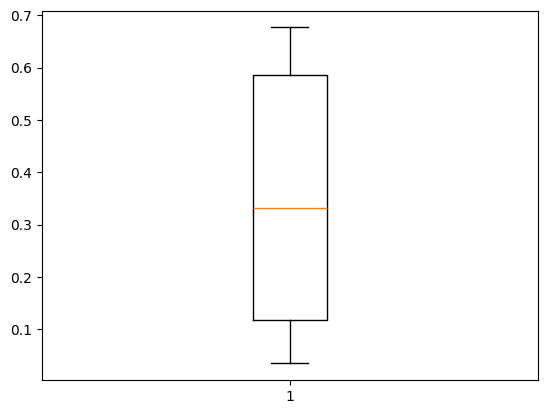

In [78]:
plt.boxplot([
    get_nlls_mtpfn(mtpfn, best_aux_data, batches).cpu(),
    # get_nlls_mtpfn(mtpfn, best_aux_data, svm_batches).cpu(),
    # get_nlls_mtpfn(mtpfn, best_aux_data, mtgp_batches).cpu(),
])
plt.show()

In [205]:
mtpfn_nlls = get_nlls_mtpfn(mtpfn, best_aux_data, batches).cpu().numpy()
mtpfn_svm_nlls = get_nlls_mtpfn(mtpfn, best_aux_data, svm_batches).cpu().numpy()
mtpfn_gp_nlls = get_nlls_mtpfn(mtpfn, [], mtgp_batches).cpu().numpy()

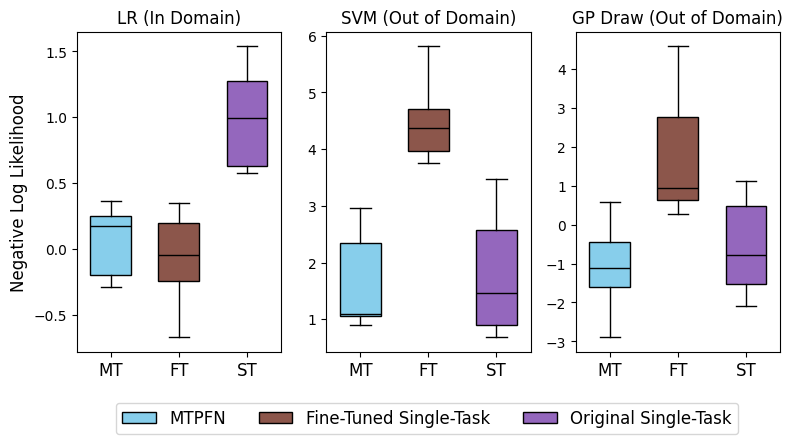

In [221]:
[(mtpfn_nlls, mtpfn_svm_nlls, mtpfn_gp_nlls),
(finetuned_nlls, finetuned_svm_nlls, finetuned_gp_nlls),
(original_nlls, original_svm_nlls, original_gp_nlls)] = pickle.load(open('figures_boxplot_data.pkl', 'rb'))

fig, axs = plt.subplots(1, 3, figsize=(8, 4))

box_colors = ['skyblue', 'C5', 'C4']
bp = axs[0].boxplot([mtpfn_nlls, finetuned_nlls, original_nlls], showfliers=False, widths=0.6, patch_artist=True)
for i, patch in enumerate(bp['boxes']):
    patch.set_facecolor(box_colors[i])
# change center line
for i, median in enumerate(bp['medians']):
    median.set(color='black', linewidth=1)
axs[0].set_title("LR (In Domain)")

bp = axs[1].boxplot([mtpfn_svm_nlls, finetuned_svm_nlls, original_svm_nlls], showfliers=False, widths=0.6, patch_artist=True)
for i, patch in enumerate(bp['boxes']):
    patch.set_facecolor(box_colors[i])
# change center line
for i, median in enumerate(bp['medians']):
    median.set(color='black', linewidth=1)
axs[1].set_title("SVM (Out of Domain)")

bp = axs[2].boxplot([mtpfn_gp_nlls,finetuned_gp_nlls, original_gp_nlls], showfliers=False, widths=0.6, patch_artist=True)
for i, patch in enumerate(bp['boxes']):
    patch.set_facecolor(box_colors[i])
# change center line
for i, median in enumerate(bp['medians']):
    median.set(color='black', linewidth=1)
axs[2].set_title("GP Draw (Out of Domain)")
axs[0].set_ylabel("Negative Log Likelihood", fontsize=12)

# add legend
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

legend_elements = [
    Patch(facecolor=box_colors[0], edgecolor='black', label='MTPFN'),
    Patch(facecolor=box_colors[1], edgecolor='black', label='Fine-Tuned Single-Task'),
    Patch(facecolor=box_colors[2], edgecolor='black', label='Original Single-Task'),
]
# legend over all subplots

# fig.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=3, fontsize=12)
fig.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.54, 0), ncol=3, fontsize=12)


for ax in axs:
    ax.set_xticklabels(["MT", "FT", "ST"], fontsize=12)
    # ax.grid(alpha=0.5, axis='y')
plt.tight_layout()
plt.savefig("finetune_nll.pdf", bbox_inches='tight')

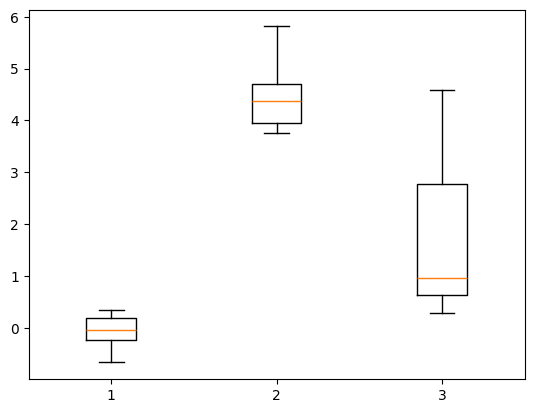

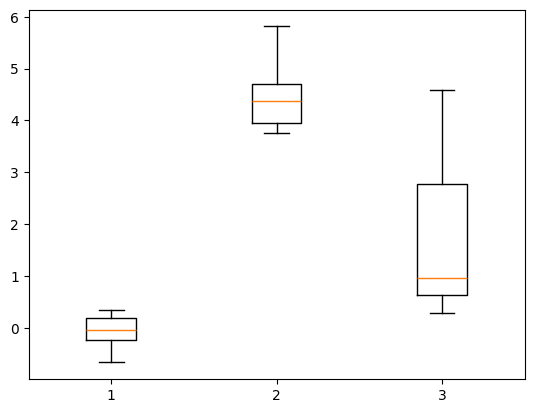

In [79]:
finetuned_nlls = get_nlls(finetuned_model, batches).cpu().numpy()
finetuned_svm_nlls = get_nlls(finetuned_model, svm_batches).cpu().numpy()
finetuned_gp_nlls = get_nlls(finetuned_model, mtgp_batches).cpu().numpy()

# box plot of nlls
plt.boxplot([finetuned_nlls, finetuned_svm_nlls, finetuned_gp_nlls], showfliers=False)
plt.show()

original_nlls = get_nlls(original_model, batches).cpu().numpy()
original_svm_nlls = get_nlls(original_model, svm_batches).cpu().numpy()
original_gp_nlls = get_nlls(original_model, mtgp_batches).cpu().numpy()

plt.boxplot([finetuned_nlls, finetuned_svm_nlls, finetuned_gp_nlls], showfliers=False)
plt.show()